In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/movies.csv
/kaggle/input/dataset/ratings_small.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load movies
movies = pd.read_csv("/kaggle/input/dataset/movies.csv", header=0)
movies = movies.replace({np.nan: None}) # replace NaN with None
movies.head()


,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,...,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,None,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81.0,373554033.0,...,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.946943,7.7,5415.0,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,None,104.0,262797249.0,...,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.015539,6.9,2413.0,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101.0,0.0,...,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.7129,6.5,92.0,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,None,127.0,81452156.0,...,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.859495,6.1,34.0,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106.0,76578911.0,...,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.387519,5.7,173.0,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    46628 non-null  int64 
 1   title                 46624 non-null  object
 2   tagline               20783 non-null  object
 3   description           45633 non-null  object
 4   genres                44104 non-null  object
 5   keywords              31739 non-null  object
 6   date                  46540 non-null  object
 7   collection            4574 non-null   object
 8   runtime               46360 non-null  object
 9   revenue               46624 non-null  object
 10  budget                46628 non-null  int64 
 11  director              45711 non-null  object
 12  cast                  44137 non-null  object
 13  production_companies  34346 non-null  object
 14  production_countries  40132 non-null  object
 15  popularity            46624 non-null

In [5]:
# Total
print (f"{len(movies)} movies in total.")


46628 movies in total.


total of 20 unique genres from 93342 occurances.


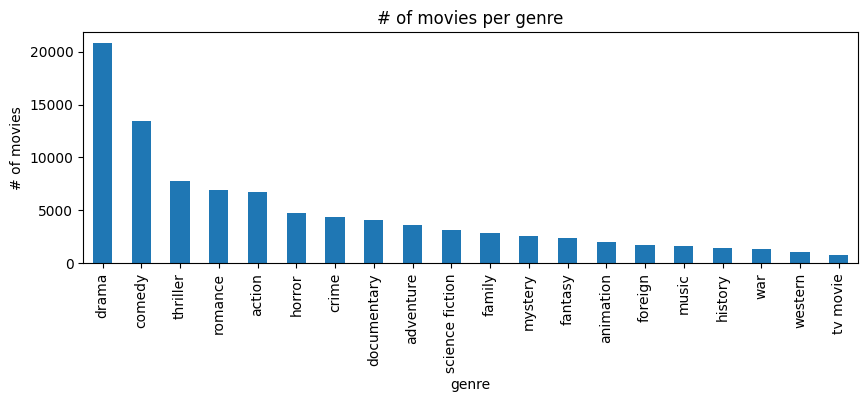

In [6]:
# Genres
all_genres = [s.split(", ") for s in movies[movies.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
print (f"total of {len(unique_genres)} unique genres from {len(genres)} occurances.")
pd.Series(genres).value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("# of movies per genre")
plt.ylabel("# of movies")
plt.xlabel("genre")
plt.show()


Total of 135 unique years from 1874 to 2020


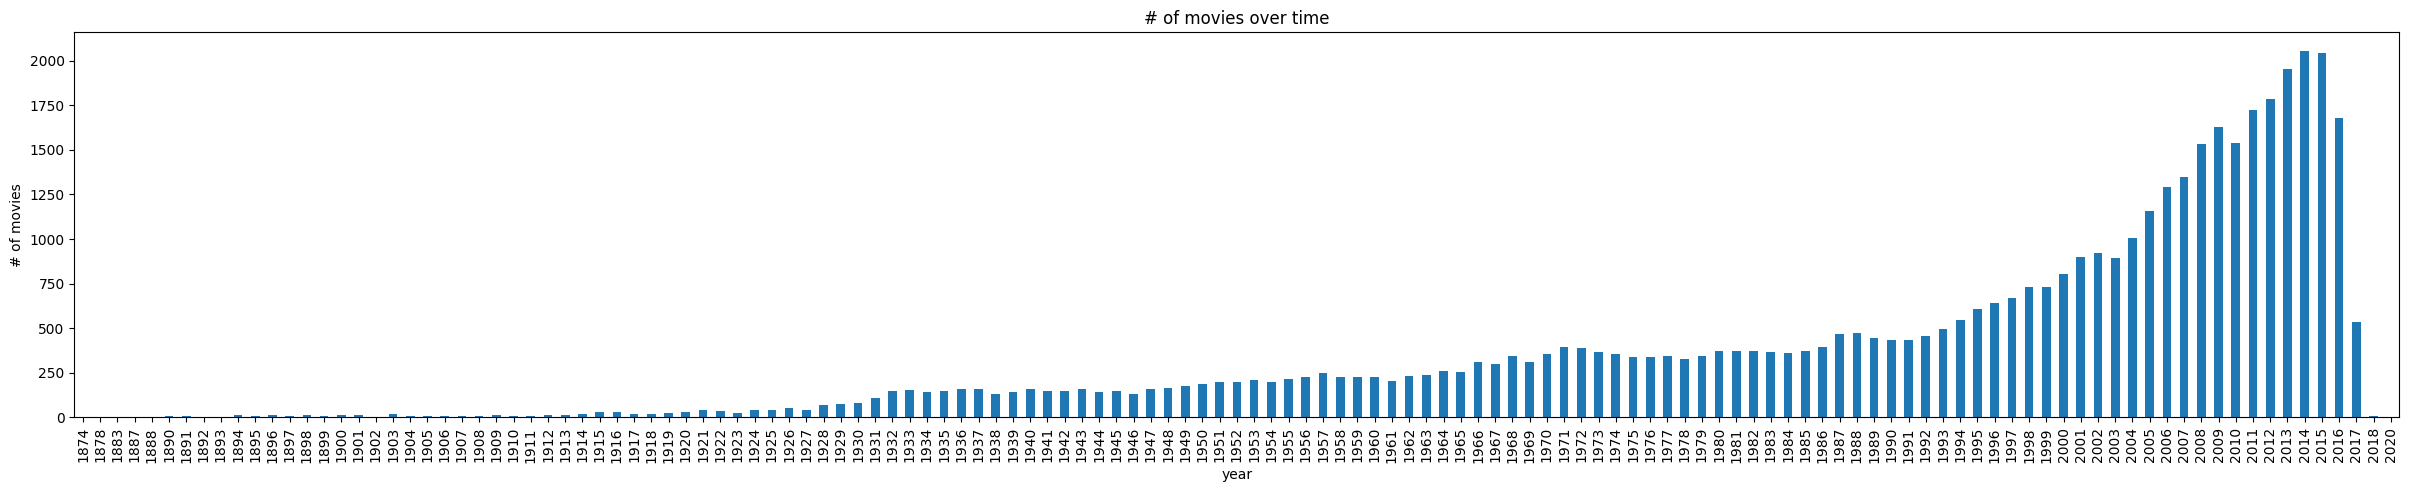

In [7]:

def get_year(date):
    year = None
    if date:
        year = date[:4]
    return year
     

# Year (example of basic feature engineering)
movies['year'] = movies.date.apply(get_year) # same as movies.date.apply(lambda date: get_year(date))
     

# Years
years = movies[movies.year.notnull()].year # get rows where year is not None
print (f"Total of {len(set(years))} unique years from {min(years)} to {max(years)}")
pd.Series(years).value_counts().sort_index().plot(kind='bar', figsize=(30, 5))
plt.title("# of movies over time")
plt.ylabel("# of movies")
plt.xlabel("year")
plt.show()
     


In [8]:
# Sort by popularity
sorted_by_popularity = movies.sort_values(by='popularity', ascending=False)
print ("Most popular movies:\n", sorted_by_popularity['title'].values[:10])


Most popular movies:
 ['Minions' 'Wonder Woman' 'Beauty and the Beast' 'Baby Driver'
 'Big Hero 6' 'Deadpool' 'Guardians of the Galaxy Vol. 2' 'Avatar'
 'John Wick' 'Gone Girl']


LOAD RATING CSV FILE

In [9]:
# Load ratings
ratings = pd.read_csv("/kaggle/input/dataset/ratings_small.csv", header=0)
ratings.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


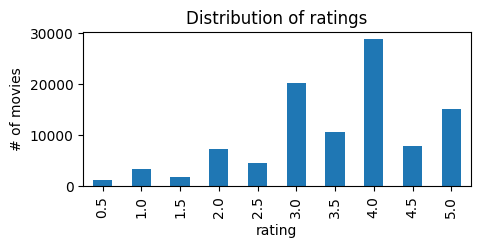

In [10]:
# Distribution of ratings
print (ratings['rating'].describe())
pd.Series(ratings['rating']).value_counts().sort_index().plot(kind='bar', figsize=(5, 2))
plt.title("Distribution of ratings")
plt.ylabel("# of movies")
plt.xlabel("rating")
plt.show()


In [11]:
sorted_by_users = ratings.groupby('userId')['movieId'].count().sort_values(ascending=False)
print ("Most active users:\n", sorted_by_users.values[:10])


Most active users:
 [2391 1868 1735 1700 1610 1340 1291 1063 1019 1011]


In [12]:
sorted_by_movies = ratings.groupby('movieId')['userId'].count().sort_values(ascending=False)
print ("Most rated movies:\n", sorted_by_movies.values[:10])
     


Most rated movies:
 [341 324 311 304 291 274 259 247 244 237]


In [13]:
!pip install surprise

In [14]:

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is needed, but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to the user id, item id, and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
     


In [15]:
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise import CoClustering
from surprise import SlopeOne
from surprise.model_selection import cross_validate


algo1 = SVD()
algo2 = KNNBasic()
algo3 = NMF()
algo4 = CoClustering()
algo5 = SlopeOne()

# Run 5-fold cross-validation and print results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
     


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


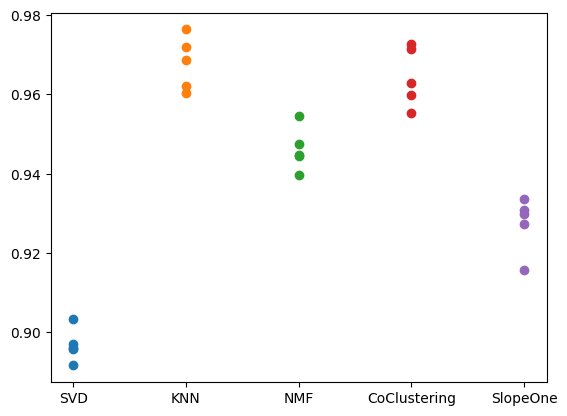

In [16]:

import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')
     


SVD outperformer from all of these

In [17]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendations to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [18]:

trainset = data.build_full_trainset()
algo1.fit(trainset)

# Then predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo1.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])


1 [2959, 913, 969, 2019, 1276, 908, 904, 1193, 296, 858]
2 [194, 3088, 1939, 1299, 1258, 926, 111, 1217, 1147, 2289]
3 [3462, 926, 922, 1172, 1193, 908, 1299, 750, 858, 1207]
4 [318, 111, 1250, 2692, 745, 923, 48516, 899, 912, 922]
5 [899, 1172, 6016, 1254, 318, 1228, 111, 7153, 3578, 2329]
6 [858, 1207, 7502, 318, 899, 1221, 912, 969, 994, 898]
7 [858, 969, 1221, 926, 912, 1203, 1945, 750, 2571, 1228]
8 [969, 1945, 905, 1276, 2692, 2542, 1212, 926, 307, 1209]
9 [858, 2858, 778, 6787, 994, 926, 4226, 5995, 1948, 1304]
10 [307, 58559, 1948, 1136, 2318, 2858, 4973, 745, 4993, 858]
11 [858, 318, 969, 1945, 1221, 904, 926, 1224, 1136, 162]
12 [858, 969, 1217, 4993, 954, 47, 926, 2019, 920, 5114]
13 [858, 905, 1225, 912, 2692, 745, 922, 3462, 6016, 1221]
14 [318, 1945, 1227, 7502, 969, 58559, 3035, 6016, 1948, 110]
15 [29, 3468, 8228, 501, 2132, 1437, 90357, 1374, 8207, 2087]
16 [2064, 858, 926, 898, 994, 905, 1945, 1172, 608, 27773]
17 [926, 2288, 1172, 2871, 8132, 1247, 899, 7063, 6126, 5

Content Filtering

In [19]:
movie_profile = movies[['id', 'title', 'genres']].copy()
movie_profile.rename(columns={'id': 'movieId'}, inplace=True)
genres = [item.strip() for l in all_genres for item in l ]
unique_genres = set(genres)
for genre in unique_genres:
  movie_profile[genre] = 0

#Now we will modify the dataset such that for each user, the concerned genre is marked as 1


for i in range(len(movie_profile)):
  if type(movie_profile['genres'].iloc[i]) != None.__class__:
    Genres = movie_profile.iloc[i].genres.split(', ')
    for g in Genres:
      movie_profile.loc[i, g] = 1


movie_profile.tail()

,movieId,title,genres,drama,music,history,adventure,family,mystery,fantasy,...,war,science fiction,thriller,western,animation,action,tv movie,foreign,romance,documentary
46623,439050,Subdue,"drama, family",1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46624,111109,Century of Birthing,drama,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46625,67758,Betrayal,"action, drama, thriller",1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
46626,227506,Satan Triumphant,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46627,461257,Queerama,None,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
movie_profile = movie_profile.drop(columns=['title', 'genres']).set_index('movieId')
     
movie_profile.sort_index(axis=0, inplace=True)
movie_profile.head()


,drama,music,history,adventure,family,mystery,fantasy,crime,horror,comedy,war,science fiction,thriller,western,animation,action,tv movie,foreign,romance,documentary
movieId,,,,,,,,,,,,,,,,,,,,
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
11,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Create the Ratings Dataset

In [21]:
user_x_movie = pd.pivot_table(ratings, values='rating', index=['movieId'], columns = ['userId'])

user_x_movie.sort_index(axis=0, inplace=True)
user_x_movie


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
from tqdm import tqdm

userIDs = user_x_movie.columns
user_profile = pd.DataFrame(columns = movie_profile.columns)

# Drop duplicate indices from movie_profile before multiplication
movie_profile_unique_index = movie_profile[~movie_profile.index.duplicated(keep='first')]

for i in tqdm(range(len(user_x_movie.columns))):
  # Use the DataFrame with unique indices for multiplication
  working_df = movie_profile_unique_index.mul(user_x_movie.iloc[:,i], axis=0)
  # working_df.replace(0, np.NaN, inplace=True)
  user_profile.loc[userIDs[i]] = working_df.mean(axis=0)

100%|██████████| 671/671 [00:08<00:00, 78.46it/s]


In [23]:
display(user_profile)

,drama,music,history,adventure,family,mystery,fantasy,crime,horror,comedy,war,science fiction,thriller,western,animation,action,tv movie,foreign,romance,documentary
1,1.333333,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.416667,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,0.000000
2,2.396552,0.051724,0.224138,0.413793,0.137931,0.465517,0.258621,0.586207,0.241379,0.982759,0.206897,0.327586,0.551724,0.000000,0.086207,0.551724,0.00,0.000000,0.879310,0.137931
3,2.180000,0.000000,0.000000,0.580000,0.320000,0.660000,0.160000,0.620000,0.220000,1.000000,0.120000,0.460000,0.780000,0.000000,0.000000,0.620000,0.16,0.120000,0.720000,0.000000
4,2.614035,0.228070,0.166667,0.500000,0.149123,0.359649,0.342105,0.719298,0.350877,1.175439,0.122807,0.684211,1.342105,0.000000,0.131579,0.982456,0.00,0.043860,0.912281,0.043860
5,2.094340,0.075472,0.075472,0.311321,0.132075,0.311321,0.462264,0.688679,0.594340,1.283019,0.000000,0.452830,0.924528,0.094340,0.075472,0.669811,0.00,0.160377,0.509434,0.301887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2.298246,0.087719,0.192982,0.543860,0.105263,0.385965,0.280702,0.684211,0.210526,1.263158,0.228070,0.491228,0.824561,0.000000,0.000000,1.000000,0.00,0.000000,0.947368,0.192982
668,2.500000,0.000000,0.000000,1.000000,0.000000,0.800000,0.000000,0.800000,0.000000,0.500000,0.000000,1.500000,2.000000,0.000000,0.000000,1.600000,0.00,0.000000,0.000000,0.400000
669,2.181818,0.363636,0.000000,0.363636,0.727273,1.090909,0.363636,1.090909,0.272727,1.454545,0.000000,0.272727,1.090909,0.000000,0.000000,0.454545,0.00,0.000000,1.545455,0.000000
670,2.823529,0.235294,0.000000,0.588235,0.000000,0.823529,0.176471,0.176471,0.411765,1.470588,0.294118,0.588235,0.764706,0.000000,0.000000,0.470588,0.00,0.294118,0.705882,0.000000


Creating the model (TF/IDF)

In [24]:

df = movie_profile.sum()
idf = (len(movies)/df).apply(np.log) #log inverse of DF

TFIDF = movie_profile.mul(idf.values)

df_predict = pd.DataFrame()

for i in tqdm(range(len(user_x_movie.columns))):
  working_df = TFIDF.mul(user_profile.iloc[i], axis=1)
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1) 

df_predict    


 14%|█▍        | 96/671 [00:01<00:10, 56.78it/s]/tmp/ipykernel_19/3341978446.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1)
/tmp/ipykernel_19/3341978446.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_predict[user_x_movie.columns[i]] = working_df.sum(axis=1)
 15%|█▌        | 102/671 [00:01<00:10, 56.62it/s]/tmp/ipykernel_19/3341978446.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
2,2.060569,3.319108,3.224263,3.809146,3.317478,3.073800,2.888053,2.668368,2.824252,2.703423,...,3.640094,2.017039,3.109144,2.676532,2.795409,3.471430,3.907884,4.338749,2.695166,2.567791
3,3.249182,3.154121,3.000817,3.568891,3.283203,2.113793,2.424785,3.605220,2.745760,3.168993,...,3.797784,3.465991,2.801088,2.617714,3.074759,3.423051,2.638019,3.566811,4.104478,3.459884
5,3.158243,2.606078,2.707363,3.159948,3.221188,2.544575,1.489234,2.445504,2.466875,2.491475,...,3.099003,1.448952,2.761683,2.652320,2.642906,3.185960,2.511824,4.384910,2.243508,2.199592
6,0.984815,3.440414,4.060793,6.002590,4.578076,5.173878,3.803708,3.429596,6.033772,2.899652,...,3.745704,0.000000,4.762208,4.674066,3.254467,5.027810,8.565540,5.409724,2.695923,3.856890
11,0.000000,3.013084,3.928792,5.030095,3.316732,3.053722,2.635539,3.252089,8.763318,4.169293,...,2.114509,7.017151,4.094399,4.768541,3.924483,4.655886,9.708854,2.548328,4.006685,3.631249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465044,1.075754,2.702455,2.234538,3.126124,3.064058,1.987871,3.010520,2.198690,2.923723,2.398328,...,3.028305,2.017039,2.217821,2.224522,2.313161,2.688787,2.017039,2.841417,2.802715,2.420084
467731,1.075754,1.933575,1.758858,2.109044,1.689746,1.321508,1.911802,1.914041,1.551569,1.690471,...,2.169438,2.017039,1.574274,1.320963,1.613631,1.854260,2.017039,1.760325,2.278068,1.914041
468343,2.983106,3.610730,3.132152,3.849085,2.661416,2.308070,2.989871,3.293828,1.845007,2.144602,...,3.695319,4.242283,2.783815,2.199841,3.240490,3.661226,2.017039,4.708051,3.624434,3.172082


Build the recommender:-

In [25]:
def recommender(user_no):
  #user predicted rating to all films
  user_predicted_rating = df_predict[df_predict.columns[user_no - 1]]

  #combine film rating and film detail
  user_rating_film = pd.merge(user_predicted_rating, movies, left_on='movieId', right_on='id')

  #films already watched by user
  already_watched = ratings[ratings['userId'].isin([user_no])]['movieId']

  #recommendation without films being watched by user
  all_rec = user_rating_film[~user_rating_film.index.isin(already_watched)]
  
  return all_rec.sort_values(by=[user_no], ascending=False).iloc[0:10][['id', 'title']]


recommender(671
            )


,id,title
10549,22160,Against All Odds
13697,29694,One of Our Dinosaurs Is Missing
22604,53670,Say Nothing
2267,4990,Hustle
6884,14207,The Librarian: Quest for the Spear
4204,10329,Congo
24936,63154,Zenith
6649,13811,Knowing
1488,2362,Westworld
8603,17590,Deathtrap
